In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input


In [2]:
#load & preprocess Mnist data
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
#Normalize input images
x_train,x_test=x_train/255.0,x_test/255.0

In [4]:
#one-hot encode
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [5]:
model=Sequential([
    Input(shape=(28,28)),# Flatten 28x28 image to 784
    Flatten(),
    Dense(128,activation='relu'),# Hidden layer with ReLU
    Dropout(0.3),
    Dense(64,activation='relu'), # Another hidden layer
    Dropout(0.3),
    Dense(10,activation='softmax') # Output layer with softmax for 10 classes
])


In [6]:
#compile the model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
#train model
history=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7615 - loss: 0.7617 - val_accuracy: 0.9588 - val_loss: 0.1413
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9305 - loss: 0.2379 - val_accuracy: 0.9703 - val_loss: 0.1052
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9456 - loss: 0.1817 - val_accuracy: 0.9742 - val_loss: 0.0873
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9550 - loss: 0.1514 - val_accuracy: 0.9747 - val_loss: 0.0876
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9602 - loss: 0.1317 - val_accuracy: 0.9757 - val_loss: 0.0832
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9646 - loss: 0.1167 - val_accuracy: 0.9768 - val_loss: 0.0741
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9667 - loss: 0.1106 - val_accuracy: 0.9788 - val_loss: 0.0691
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9707 - loss: 0.0987 - val_accuracy: 0.

In [8]:
#evaluate the model
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f"Test Accuracy:{test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9716 - loss: 0.0922
Test Accuracy:0.9755


In [9]:
import matplotlib.pyplot as plt 

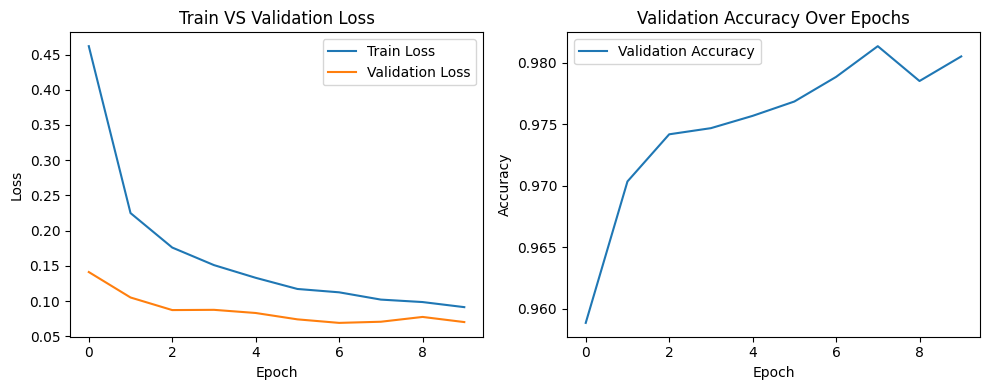

In [10]:
#plot train & validation loss
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Train VS Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

#plot Validation  Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()